**INTRODUCTION**
<a href="http://imgbb.com/"><img src="http://www.tania-magdalene.com/wp/wp-content/uploads/2015/03/websiteanimalhealings.jpg" alt="int" border="0"></a>

First we import a few packages numpy, pandas for data processing and reading csv files., seaborn fro visulazation, ad finally matplotlib.

Running this will list all the files in the directory

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as patches


from subprocess import check_output


In [4]:
data = pd.read_csv('Health_AnimalBites.csv')

In [6]:
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


The data looks at 9 different animals and their bite numbers

In [8]:
species = data.SpeciesIDDesc
species = species.dropna() 
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


In [9]:
animal_list = []
for  i in speciesOfAnimal:
    animal_list.append(len(species[species==i]))
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=90)
print(animal_list)

[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


In [10]:
def animal_month(animal,data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']
    numberOfAnimal = []
    for i in month_list:
        x = data.loc[(data['SpeciesIDDesc']==animal)&(data['bite_date'].str.split('-').str[1]==i)]
        numberOfAnimal.append(len(x))
    ax = sns.barplot(x=month_list,y=numberOfAnimal,palette  = "Greens")
    plt.title(animal + ' bite for 12 month')

In [11]:
animal_month('DOG',data)

In [12]:
animal_month('BAT',data)

In [13]:
count = data.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=40)
plt.ylabel("Number of Bite")
print(count[0:10].index)

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object')


In [14]:
def bite_place(animal,data):
    bitePlaces = data.WhereBittenIDDesc.unique()
    head = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='HEAD')]
    body = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='BODY')]
    numberOfHead = len(head)
    numberOfBody = len(body)
    total = numberOfHead+numberOfBody
    fig1=plt.figure()
    ax1=fig1.add_subplot(111,aspect='equal')
    ax1.add_patch(
        patches.Rectangle((0.3,0.1),0.4,0.5,alpha=numberOfBody/float(total),color='c')
    )
    circle = plt.Circle((0.5,0.7),0.1,color='m',alpha=numberOfHead/float(total))
    ax1.add_artist(circle)
    plt.text(0.45,0.7,round(numberOfHead/float(total),2))
    plt.text(0.45,0.4,round(numberOfBody/float(total),2))
    plt.title(str(animal)+' Bite Probability of Head and Body')

In [27]:
bite_place('DOG', data)

In [28]:
bite_place('CAT',data)

In [29]:
bite_place('BAT',data)

**Bite Positions**
* Dogs are 19% more likely to bite people on the head adn 81% on the body.
* Cats are 4% more likely to bite people on the head and 96% on the body.
* Bats are 5% more likely to bite people on the head and 95% on the body.

In [30]:
gender = ['MALE', 'FEMALE']
count_gender = data.GenderIDDesc.value_counts()
plt.figure(figsize = (4, 4))
x = sns.barplot(x = gender, y = count_gender[0:2])
plt.ylabel('Number of Bites')
plt.xticks(rotation = 10)
plt.title('MALE VS FEMALE')
print(count_gender[0:2])

MALE      3832
FEMALE    2016
Name: GenderIDDesc, dtype: int64


In [31]:
def rabid_prob(animal,data):
    labels = ['POSITIVE','NEGATIVE']
    colors = ['cyan','green']
    explode = [0.1,0]
    p = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='POSITIVE')]
    n = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='NEGATIVE')]
    sizes = [len(p),len(n)]
    print(sizes)
    if len(p)==0:
        labels = ['','NEGATIVE']
    plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct ='%1.1f&&')
    plt.axis('equal')
    plt.title(animal + ' Rabid Probability')
    plt.show()

[1, 58]


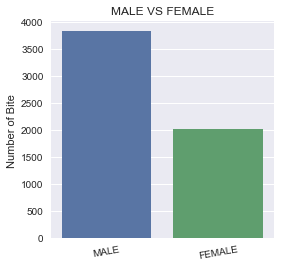

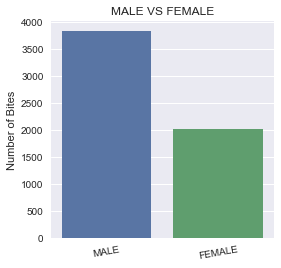

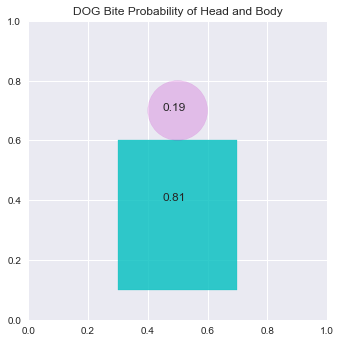

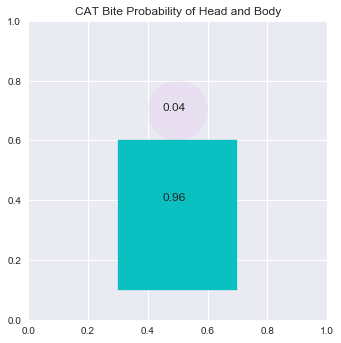

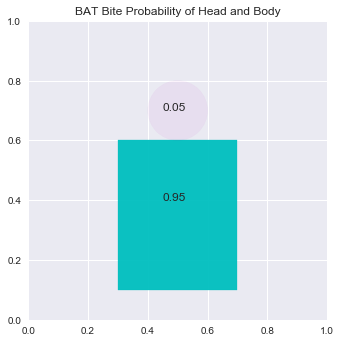

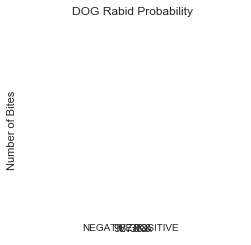

In [32]:
rabid_prob('DOG', data)

[3, 160]


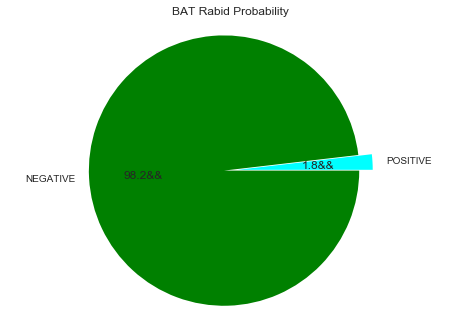

In [33]:
rabid_prob('BAT',data)

In [34]:
a = data.loc[(data['ResultsIDDesc']=='POSITIVE')]
a = a.loc[:,['bite_date','SpeciesIDDesc','BreedIDDesc','GenderIDDesc','color','ResultsIDDesc']]
print(a)

                bite_date SpeciesIDDesc      BreedIDDesc GenderIDDesc  color  \
1418  2015-05-05 00:00:00           BAT              NaN          NaN    NaN   
1502  2017-04-29 00:00:00           DOG  GREAT PYRENEESE       FEMALE  WHITE   
1677                  NaN           BAT              NaN          NaN    NaN   
1678                  NaN           BAT              NaN          NaN    NaN   

     ResultsIDDesc  
1418      POSITIVE  
1502      POSITIVE  
1677      POSITIVE  
1678      POSITIVE  


**CONCLUSION**
* The data gives us a good amount of information about animal bites and which animals are more likely to bite people and where the mst common bite locations are.
* Even with this data we cannont predict if an animals is going to bite someone because animals are just that animals and can be unpredictable when pushed to the limits.